Generates minimalistic plots for a variety of distribution types.

15th April 2021, Yan Fu

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sfeprapy.mcs.mcs_gen_2 import InputParser
plt.style.use('seaborn-white')

In [69]:
# Sample defined distributions using `InputParser`, a thin layer built on top of scipy.stats module.

dist_obj = InputParser()
df_dists = dist_obj.inputs2samples(
    dist_params={
        'Gumbel Type I': dict(
            dist = 'gumbel_r_',
            mean = 0,
            sd = 1,
            ubound=4,
            lbound=-4,
        ),
        'Normal': dict(
            dist = 'norm_',
            mean=0,
            sd=1,
            ubound=4,
            lbound=-4,
        ),
        'Uniform': dict(
            dist = 'uniform_',
            ubound=4,
            lbound=-4,
        ),
        'Lognorm': dict(
            dist = 'lognorm_',
            mean=1,
            sd=1,
            ubound=4,
            lbound=-4,
        ),
        'Complementary Lognorm': dict(
            dist='lognorm_mod_',
            ubound=1,
            lbound=0,
            mean=0.2,
            sd=0.2,
        )
    },
    num_samples = 10000
)

df_dists.drop('index', axis=1, inplace=True)  # index column not used

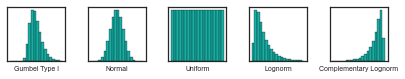

In [107]:
# Plots

fig, axes = plt.subplots(nrows=1, ncols=len(df_dists.columns), figsize=(1.15*len(df_dists.columns), 1.2))

for i, k in enumerate(df_dists.columns):
    try:
        ax = axes[i]
    except TypeError:
        ax = axes

    data = np.array(df_dists[k].values)
    bins=np.linspace(data.min(), data.max(), 20)
    ax.hist(data, bins=20, alpha=0.9, histtype='bar', ec='k', color=(0, 164/255, 153/255))

    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel(k, fontsize='x-small')

plt.tight_layout()
fig.savefig('dists.png', dpi=300, bbox_inches='tight', pad_inches=0.015)